<a href="https://colab.research.google.com/github/Chiraagkv/ASL/blob/main/Theoretical_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📚 Theoretical Machine Learning**

# **Core Concepts**
1. Probability & Distributions
2. Information Theory
3. Linear Algebra Recap
4. Calculus & Optimization
5. Bias-Variance Tradeoff

## **Overfitting and Underfitting**
 The Bias-Variance Tradeoff


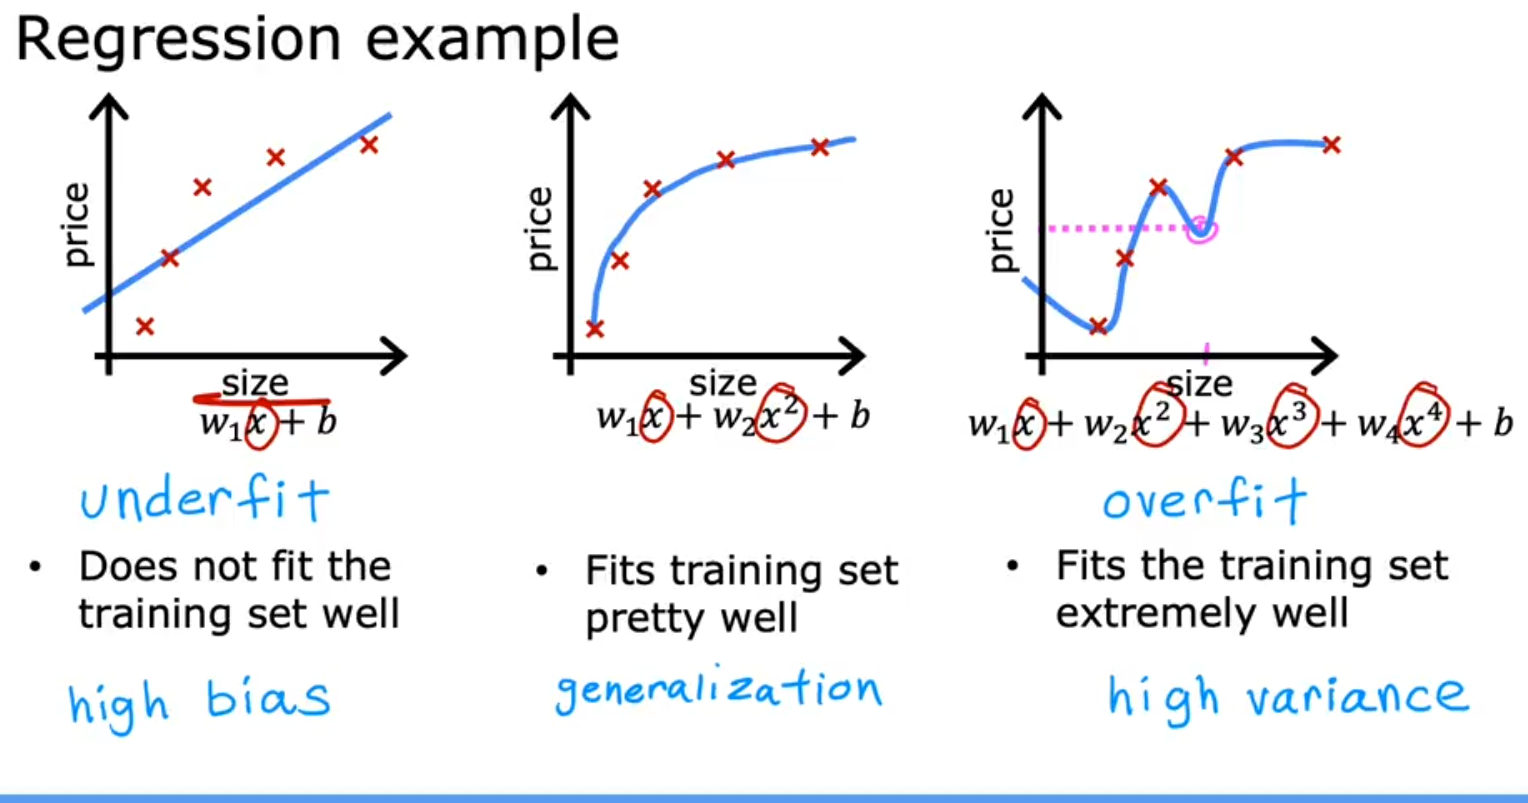

 **Countering Overfitting**
* More diverse data
* Feature engineering/selection
* Regularization (L1, L2, L1+L2) <a href="#scrollTo=mMsV7-CfQXWM" target="_self">See Regularization Techniques</a>

# **Loss Functions**


1. Regression
  - MSE
  - MAE
  - Huber
2. Classification
  - Cross-Entropy
  - Hinge Loss
3. KL Divergence (later)

# **Optimizers**


1. Batch Gradient Descent ✅
2. Stochastic Gradient Descent and Mini-Batch Gradient Descent ✅
3. Momentum Gradient Descent ✅
4. Nesterov Accelerated Gradient Descent ✅
5. AdaGrad ✅
6. RMSProp ✅
7. Adam ✅
8. Coordinate Descent

### **Batch Gradient Descent**


* An algorithm used to optimize a given model on the basis of its cost function.
* It takes the partial derivative of the loss function with respect to its current weights and uses that to minimize the cost.

#### **Working**
* Let $J(w, b)$ be the cost function, where $w$ is the weights vector and $b$ is the bias term
* Let $α$ be the learning rate
  * It helps control the pace at which the algorithm converges. Too fast, and the algorithm might overshoot and oscillate about its minima forever.

##### **Algorithm**
$$w_j := w_j - α\frac{∂J(w, b)}{∂w_j}\\
b := b - α\frac{∂J(w, b)}{∂b}
$$
* where $w_j$ is the $j^{th}$ weight in the weight vector
* The algorithm is repeated till convergence to the local/global minima

### **Stochastic Gradient Descent and Mini-Batch Gradient Descent**


#### **Stochastic Gradient Descent (SGD)**
* Uses the same algorithm as the regular gradient descent, but updates weights based on loss instead of cost.
* **Loss vs Cost:**
  * Loss is calculated for each sample
  * cost is the average loss over all samples
* This means that in SGD, based on the loss in each sample, the weights get updated

##### **Pros**
* This method adds a bit of randomness (the loss is calculated for different samples, so for some samples, loss might be high, for others low). This helps models **escape local minima and reach the global minima**.
* Since the weights are updated per sample, **convergence is faster**.

#### **Mini-Batch Gradient Descent**
* Same as SGD, but instead of using every sample independently, the model uses the cost over smaller subsets of data

##### **Pros**
* Control randomness and offers a mixed approach that is both stable and efficient

### **Momentum Gradient Descent**


* The algorithm builds up a certain "momentum" in the general direction that the model was going in.
  * This is similar to a rock rolling down a slope. Even if the rock enocounters a valley, it can overcome it due to the momentum it has built up as it rolled down. Therefore, **unless a deep enough minima is found, the model can escape the local minima**

#### **Algorithm**
$$
v_{t+1} = β v_t + (1-β)∇J(w_t)\\
w_{t+1} = w_t - αv_{t+1}
$$
* where $t$ represents the number of iterations the algorithm has run.
* [Why is the formula like that](https://towardsdatascience.com/gradient-descent-with-momentum-59420f626c8f/)

### **Nesterov Accelerated Gradient Descent**

* Modification of Momentum Gradient Descent

#### **Algorithm**
$$
v_{t+1} = β v_t + α∇J(w_t - βv_t)\\
w_{t+1} = w_t - v_{t+1}
$$

#### **Pros**
* Faster convergence due to the predictive nature of the momentum term.
* More stable optimization by reducing oscillations and overshooting.
* Better performance in handling plateaus and complex, high-dimensional loss surfaces.
* Improved generalization with faster training and fewer iterations.
* Efficiency in deep learning, where optimization landscapes are highly non-convex.

### **AdaGrad**


* AdaGrad is a modification of Gradient descent that adaptively modifies the learning rate.
* It scales the learning rate by the inverse of the RMS (root mean squared) of the previous gradients (When the algorithm is in a plateau, it moves faster since the RMS is smaller than when the algorithm is in a steep slope, where it moves very slowly so as to not miss the minima)
* It doesn't have a momentum aspect, so it will get stuck at local minima, if any.

#### **Algorithm**
$$
G_{t+1} = \sum^{t}_{i=1}g_i^2\\
w_{t+1} = w_t - \frac{1}{\sqrt{G_{t+1} + ϵ}}g_{t}
$$
* $g_t$ is $∇J(w)$ at the $t^{th}$ iteration
* $ϵ$ is a very small value like $10^{-8}$ to avoid divison by 0

### **RMSProp**


1. Learning Rate Adaptation:
  * RMSProp adapts the learning rate for each parameter, based on the recent magnitudes of the gradients. This means it adjusts the step size (learning rate) according to how large or small the gradients are.
  * If the gradient is large, it reduces the learning rate, and if the gradient is small, it increases the learning rate. (minimizes chance of osciallations and traverses plateaus faster)
2. Running Average of Squared Gradients:
  * Instead of using just the gradient value (like in regular gradient descent), RMSProp keeps a running average of the squared gradients. This is done using an exponentially decaying average.

  * The idea is that if the gradient for a parameter has been large for some time, the learning rate for that parameter will decrease, and vice versa.
  * RMSProp lacks any momentum aspect
#### **Working**
$$
v_t = βv_{t-1} + (1-β)(∇J(w_{t-1}))^2\\
w_t = w_{t-1} - \frac{α}{\sqrt{v_t + ϵ}}∇J(w_{t-1})
$$
  * $ϵ$ is a very small value like $10^{-8}$ to prevent division by 0

### **Adam**



* **Adam** (short for **Adaptive Moment Estimation**) is an optimization algorithm that combines the **benefits of momentum** and **adaptive learning rates** (like RMSProp). It's widely used in deep learning because it's **efficient**, **robust**, and **works well out of the box**.


---

#### **Working Rules**

Adam maintains:

1. **First moment (mean) of gradients** → like **momentum**
2. **Second moment (uncentered variance)** of gradients → like **RMSProp**

It uses these two "memories" to adapt the learning rate **per parameter**, while also smoothing updates over time.

**Definitions**
* $g_t$: gradient at time step $t$
* $m_t$: first moment (mean of gradients)
* $v_t$: second moment (mean of squared gradients)
* $\beta_1$: decay rate for first moment (usually 0.9)
* $\beta_2$: decay rate for second moment (usually 0.999)
* $\epsilon$: small constant to avoid division by zero (usually $10^{-8}$)
* $\eta$: learning rate

#### **Algorithm**

1. **Compute gradient**:

   $$
   g_t = \nabla_\theta J(\theta_t)
   $$

2. **Update biased first moment estimate (momentum-like)**:

   $$
   m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
   $$

3. **Update biased second moment estimate (RMS-like)**:

   $$
   v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
   $$

4. **Bias correction** (because $m_t$, $v_t$ are initialized at 0):

   $$
   \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
   $$

5. **Update parameters**:

   $$
   \theta_{t+1} = \theta_t - \eta \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
   $$


#### Advantages

* **Combines benefits of RMSProp and momentum**.
* **Works well with sparse gradients** (like in NLP).
* **Requires little hyperparameter tuning** (defaults work well).
* **Adaptive per-parameter updates** — scales well for complex models.


#### Disadvantages

* **Can converge to suboptimal solutions** in some cases (especially compared to SGD in some convex or very smooth problems).
* **Can overfit** — sometimes doesn’t generalize as well as SGD with momentum.
* Sensitive to **learning rate schedule** in certain problems.


#### 🔁 Adam Variants

| Optimizer   | What It Adds or Changes                                           |
| ----------- | ----------------------------------------------------------------- |
| **AdamW**   | Fixes weight decay handling (better generalization)               |
| **AMSGrad** | Ensures non-increasing second moment (for convergence guarantees) |
| **AdaMax**  | Uses $\ell_\infty$ norm instead of $\ell_2$ norm                  |
| **Nadam**   | Adam + Nesterov momentum                                          |


# **Model Families**


1. Linear Models ✅
  - Linear Regression
  - Logistic Regression
  - Softmax Regression (multi-class logistic regression)
  - <a href="#scrollTo=mMsV7-CfQXWM" target="_self">Ridge, Lasso</a>
2. Tree-Based Models
  - Decision Trees (CART, ID3) ✅
  - Random Forests ✅
  - Gradient Boosted Trees (XGBoost, LightGBM, CatBoost)
3. Kernel Methods
  - SVMs (linear and kernel)
  - Kernel Ridge Regression
4. Probabilistic Models
  - Naive Bayes
  - Gausian Markov Models
  - Hidden Markov Models
  - Bayesian Logistic Regression
5. Instance-Based Models ✅
  - KNNs
  - Radius Neighbours

## **Linear Models**

### **Linear Regression**

#### **Terminology**
* $x_i$: $i^{th}$ input variable
* $y_i$: $i^{th}$ output variable
* $m$: upper limit of $i$
* $h(x)$: Hypothesis function
* $ŷ$: Predicted output of $h(x)$
* $w$: weight
* $b$: bias



#### **Working Principle**
#### 1. **Hypothesis Function h(x)**
  $$h_{w,b}(x)= wx + b$$
  * This tries to predict a $y$ for a given $x$

#### 2. **Cost Function J(w,b)**
  * Finds the error in the model
  * MSE: $$J(w,b) = \frac{\sum_{i=1}^n\ (ŷ_i - y_i)^2}{2n}$$
    * Divided by $2n$ for derivative purposes.

#### 3. **Gradient Descent**
* **Working Principle**:
  1. Plot the graph of J vs w (assume b is a constant for now)
  2. at the current value of w, find derivative of the J function at that coordinate. Now, negative of the derivative is the path to be taken to reach the minima.
  3. alpha is **learning rate** that makes sure that the model does not move too much towards the minima that it overshoots past it.
  4. Do same for b also SIMULTANEOUSLY
$$w = w - α \frac{∂}{∂w}J(w,b)\\
b = b - α \frac{∂}{∂b}J(w,b)$$

#### **4. Putting this together**
Repeat till minima reached:
  1. find $ŷ$ values for your training data with whatever $h(x)$ you have.
  2. Find the cost $J(w,b)$ for the present $h(x)$
  3. Update the $w$ and $b$ values based on Gradient Descent.

#### **Example**


**Given:**
1. h(x) = 2x + 3
2. X = [1, 2, 3]
3. Y = [3, 5, 7]
4. J is MSE: $$J(w,b) = \frac{\sum_{i=1}^n\ (wx_i + b - y_i)^2}{2n}$$
5. Calculated Partial Derivatives: $$\frac{∂}{∂w}J(w, b) = \frac{\sum_{i=1}^n\ (wx_i + b - y_i).x_i}{n}\\
\frac{∂}{∂b}J(w, b) = \frac{\sum_{i=1}^n\ (wx_i + b - y_i)}{n}$$
6. α = 0.1

**Working:**
* Y predicted = [5, 7, 9]
* J(2, 3) = 2
* $w = w - α(\frac{2×6}{3})$ and $b = b - α(\frac{2}{3})$
* Now, w = 1.6 and b = 2.933
* J(1.6, 2.933) = 0.6955 (much much lesser)

In [ ]:
import random
def hypothesis(w, b, X):
  return [w*i+b for i in X]

def mse_modded(Y, Y_pred): # modded because of the 1/2
  ans = 0
  for i in range(len(Y)):
    ans += (Y[i] - Y_pred[i])**2
  return ans/(2*len(Y))

def gradient_descent(X, Y, lr, w, b):
  w_correction = lr*(sum([(hypothesis(w, b, X)[i] - Y[i])*X[i] for i in range(len(X))])/len(X))
  b_correction = lr*(sum([(hypothesis(w, b, X)[i] - Y[i]) for i in range(len(X))])/len(X))
  w -= w_correction
  b -= b_correction
  return w, b

def uni_linear_regression(X, Y, epochs=5, lr=0.01):
  w = random.random()
  b = random.random()
  for i in range(epochs):
    Y_pred = hypothesis(w, b, X)
    cost = mse_modded(Y, Y_pred)
    w, b = gradient_descent(X, Y, lr, w, b)
    print("Present cost:", cost)

In [ ]:
X = [1, 2, 3, 4, 5]
Y = [3, 5, 7, 9, 11]
uni_linear_regression(X, Y, epochs=10)

Present cost: 7.663793587397455
Present cost: 5.959743670973275
Present cost: 4.63504555633149
Present cost: 3.605247249968433
Present cost: 2.804697621183241
Present cost: 2.182360918361637
Present cost: 1.6985630655786814
Present cost: 1.3224623048196285
Present cost: 1.0300829286242839
Present cost: 0.8027867468973706


### **Multiple Linear Regression**
* NOT multivariate regression (that is predicting multiple output variables.)

**Notation Update**
* $X_j$ is the $j^{th}$ feature
* $X^{(i)}$ is the $i^{th}$ sample. It is a 1 D matrix (vector)

#### **Working Principle**
* W is the Weights Matrix of shape (1, n) where n is the number of features.
* X is a sample of shape (1, n)
* W, X are in capital because they are vectors
#### **Hypothesis Function h(x)**
$$h_{(W,\ b)}(X) = W_1X_1 + W_2X_2 +...+W_nX_n + b\\
⇒ h_{(W,\ b)}(X) = W.X + B
$$

#### **Cost function J(W, b)**
* Pretty much the same, except w → W

#### **Gradient Descent**
$$w_j = w_j - α\frac{∂}{∂w_j}J(W, b)\ \ ∀\ \ 0 < j ≤ n\\
b = b - α\frac{∂}{∂b}J(W, b)$$


In [ ]:
import numpy as np

def h(X, W, b):
  return X@W + b

def loss(Y, Y_pred):
  return np.sum((Y - Y_pred)**2)/(len(Y)*2)

def gradient_descent(W, X, Y, b, lr):
  m = len(X)
  n = len(X[0])
  Y_pred = h(X, W, b)
  W_correction = lr * (X.T@(Y_pred-Y))/m #lr * np.sum(np.multiply(np.reshape(Y_pred - Y, (1, len(Y))), X), axis=0)/len(X)
  b_correction = lr * np.sum(Y_pred - Y)/m
  W -= W_correction
  b -= b_correction
  return W, b

def linear_regression(X, Y, epochs=5, lr=0.01, decay=0):
  n = len(X[0])
  W = np.random.rand(n)
  b = 0
  for i in range(epochs):
    lr = lr / (1 + decay*i)
    Y_pred = h(X, W, b)
    cost = loss(Y, Y_pred)
    W, b = gradient_descent(W, X, Y, b, lr)
  print(f"Cost {i}: ", cost)
  return W, b

In [ ]:
X = np.random.randint(-10, 10, (100, 5))

Y = np.sum(X, axis=1) * 2 + 3
W, b = linear_regression(X, Y, epochs=5000, lr=0.01, decay=0)

print("Learned Weights:", W)
print("Learned Bias:", b) # As close to perfection as possible. All weights are 2, bias is basically 3

Cost 4999:  2.935321846043439e-28
Learned Weights: [2. 2. 2. 2. 2.]
Learned Bias: 2.999999999999975


### **Practical Tips for Linear Regression**

#### **Feature Scaling**
* Convert all features to a certain range to help the model converge faster
1. Divide all values with the largest one
2. find average, subtract it from all and then divide everything by maximum absolute value of the data. (Mean Normalization)
3. find mean μ and std. deviation σ
apply the transformation: $x_i = \frac{x_i - μ_i}{σ_i}$ (Z-Score Normalization)


#### **Checking If Gradient Descent is working**
* If J(W, b) vs epochs curve should always be decreasing. If it increases, there is something wrong with the learning rate.
* Test for convergence: Find a acceptably small value of error (ϵ) and as soon as J(w, b) ≤ ϵ, stop it

#### **Choosing a Good Learning Rate**
* with a small enough α, the model should constant converge. So if it starts oscillation, decrease the lr and try again
* 0.001,0.003, 0.01, 0.03, 0.1, 0.3, 1
are the go-to

#### **Feature Engineering**
* We can manipulate whatever features we have to create better features.
* example: If house price ∝ area and the data has 2 features: length, breadth. We create a new one which gives area

### **Note:** Polynomial Regression
* More complex functions can be used to represent the data more accurately
* We have to calculate the hypothesis function and the gradient descent for each separately
* e.g.: $h(x) = w_1x + w_2\sqrt{x}+b$


### **Classification using Logistic Regression**

#### **The Sigmoid Function**:
$$g(z) = \frac{1}{1+e^{-z}}$$

#### **Activated Hypothesis Function h(x)**
* Returns a number between 0 and 1
* This can be interpreted as the "Probability" of the output being 1.
$$f_{W, b}(X) = W.X + b\\
h(x) = g(f(x))$$

##### **Decision Boundary**
* put $f(X)$ as 0 which makes $h(x)$ = 0.5, which is neither 1 or 0
* To fit better examples, we can modify the $f(x)$ to be non linear

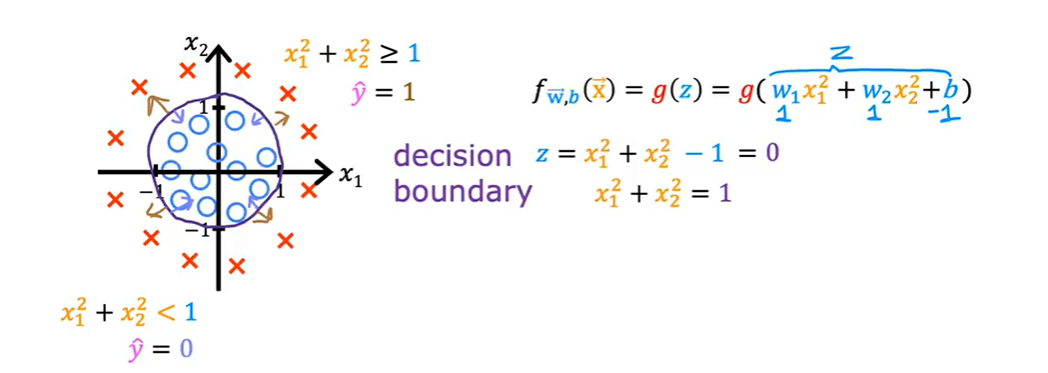

#### **Cost Function**
$$J(W, b) = \frac{1}{m}\sum^m_{i=1}L(X^{(i)}, Y^{(i)})$$
* $L(X^{(i)}, Y^{(i)})$ is the **Log Loss Function** or **Binary Cross Entropy Function** defined as:
$$L(X^{(i)}, Y^{(i)}) = -log(h(X^{(i)}))\ for\ Y^{(i)}=1,\\
\ \ \ \ \  = -log(1-h(X^{(i)}))\ for\ Y^{(i)}=0\\
$$

* Hint: Graph these plots and see how their values act as they reach 1 and 0 respectively
* The point of doing this was to get a convex cost function (1 minima) like MSE was for Linear Regression (MSE is not concave for Logistic regression due to an exponential term in the hypothesis function)

#### **Simplified Loss Function**
* Convert it from piecewise to simple function
* $X^{(i)}$ is x
* $Y^{(i)}$ is y
$$L(h(x),y) = -y\ log(h(x)) - (1-y)\ log(1-h(x))$$



#### **Gradient Descent**
* same steps as in regression
* Comes out to be:
$$
w_j = w_j + \frac{α}{m} \sum^m_{i=1}(h(X^{(i)}) - Y^{(i)})X_j^{(i)}\\
b = b + \frac{α}{m} \sum^m_{i=1}(h(X^{(i)}) - Y^{(i)})
$$

### **Multi Class Classification using Logistic Regression**

#### **How the Model is Structured**
* We have an input layer of shape $(m, n)$.
  * $m$ is number of records
  * $n$ is number of features.
* The weights matrix is of the shape $(K, n)$.
  * $K$ is the number of classes to classify
  * Each row contains the weights corresponding to each feature for any of the $K$ classes. **Basically, it stores how each feature affects the likelihood of the input being that class.**
* The logits (score) is calculated by $Z = XW^T+B$.
  * $B$ is a matrix of shape $(K,)$
  * $Z$ is of the shape $(m, K)$
* These logits give a rough score about how close the input is to one of the classes. The Softmax Function converts this array of scores into an array of probabilities (They all add up to 1).

#### **The Softmax Function**
* Takes in the array of logits.
$$σ(\vec{z_i}) = \frac{e^{z_i}}{\sum^K_{j=1}e^{z_j}}$$
* Here:
  - σ is the softmax function
  - $z_i$ is the score of the $i^{th}$ class from the input. Same for $j$

#### **Loss Function: Categorical Cross Entropy**
* **Note:** for this loss function to work, the output has to be ONE-HOT-ENCODED
  * e.g. if there are 5 classes and the correct class is the 2nd one, $y = (0,1,0,0,0)$
* Let: $\hat{y} = (\hat{y}_1, \hat{y}_2, ..., \hat{y}_k)$ where: $$\hat{y}_k = P(y_k|x) = \frac{e^{z_k}}{\sum^K_{j=1}e^{z_j}}$$
* The Loss function $L(\hat{y}, y)$ is given as:
$$
L(\hat{y}, y) =- \sum^K_{k=1}y_k\ log(\hat{y}_k)
$$
* Now say the $j^{th}$ class is the correct one. All terms (but the $j^th$ one) will become 0 because $y_k = 0\ ∀\ k \neq j$
* Therefore loss is now $L = - log(\hat{y}_j)$
  * **Why This Works:** at $\hat{y}_j = 1$, loss is 0, as it should be. Even small deviations are strictly penalised in a logarithmic scale.


## **Tree-Based Models**

### **Decision Trees**
- Explained for binary classification for simplicity. Same applies to multi-class classification

- Decision tree is a flowchart-like arrangement of various boolean statements where the outcome can be yes or no (like a Binary Trees)
- Each node in the tree aims to classify the data to its best. Ideal case is when a series of splits in the tree gives pure outcomes (100% one class)


#### Measures of impurity
1. Entropy: The equation is taken from information theory (same as logistic regression one):
$$Entropy(p) = -p\log_{2}p - (1-p)\log_2(1-p)
$$
- p is the fraction of classes that follow the rules and is part of class 1

2. Gini Impurity
$$Gini(p) = 1-p^2 - (1-p)^2$$

3. Information/Gini gain
$$Information/Gini\ Gain = Impurity(before\ split) - \sum_{children}\frac{n_{child}}{n_{parent}}Impurity(child)$$
- $n_{child}$ gives number of data points that satify the new split
- $n_{parent}$ gives number of data points that satify the parent split
- This gain through adding a node is used to evaluate whether or not making the split is necessary.

In [ ]:
class Node:
  def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
    self.feature_index = feature_index
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value
  def is_leaf(self):
    return self.value is not None

class DecisionTree:
  def __init__(self, max_depth=100, min_samples_split=2):
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.root = None

  def fit(self, X, y):
    self.n_classes_ = len(set(y))
    self.root = self._grow_tree(X, y)

  def _grow_tree(self, X, y, depth=0):
    num_samples, num_features = X.shape
    num_labels = len(np.unique(y))
    if (depth >= self.max_depth or
        num_labels == 1 or
        num_samples < self.min_samples_split):
      leaf_value = self._most_common_label(y)
      return Node(value=leaf_value)
     best_feature, best_thresh = self._best_split(X, y, num_features)

     if best_feature is None:
      leaf_value = self._most_common_label(y)
      return Node(value=leaf_value)

    indices_left = X[:, best_feature] < best_thresh
    X_left, y_left = X[indices_left], y[indices_left]
    X_right, y_right = X[~indices_left], y[~indices_left]

    left_node = self._grow_tree(X_left, y_left, depth+1)
    right_node = self._grow_tree(X_right, y_right, depth+1)
    return Node(best_feature, best_thresh, left_node, right_node)

  def _best_split(self, X, y, num_features):
    best_gini = 1.0
    best_feature, best_threshold = None, None

    for feature_index in range(num_features):
      thresholds = np.unique(X[:, feature_index])
      for t in thresholds:
        left_mask = X[:feature_index] < threshold
        right_mask = ~left_mask
        if len(y[left_mask]) == 0 or len(y[right_mask]) == 0:
          continue

        gini = self._gini_index(y[left_mask], y[right_mask])
        if gini < best_gini:
          best_gini = gini
          best_feature = feature_index
          best_threshold = t
    return best_feature, best_threshold

  def _gini_index(self, left_labels, right_labels):
    def gini(labels):
      classes, counts = np.unique(labels, return_counts=True)
      probs = counts/counts.sum()
      return 1.0 - np.sum(probs ** 2)

    total = len(left_labels) + len(right_labels)
    return (len(left_labels)/total) * gini(left_labels) + (len(right_labels)/total) * gini(right_labels)

  def _most_common_label(self, y):
    labels, counts = np.unique(y, return_counts=True)
    return labels[np.argmax(counts)]

  def predict(self, X):
    return np.array([self._traverse_tree(x, self.root) for x in X])
  def _traverse_tree(self, x, node):
    if node.is_leaf():
      return node.value

    if x[node.feature_index] < node.threshold:
      return self._traverse_tree(x, node.left)
    return self._traverse_tree(x, node.right)

  def print_tree(self, node=self.root, depth=0):
    indent = "    " * depth
    if node.is_leaf():
        print(f"{indent}Class: {node.value}")
    else:
        print(f"{indent}[Feature {node.feature_index} < {node.threshold:.2f}]")
        self.print_tree(node.left, depth + 1)
        self.print_tree(node.right, depth + 1)


### **Random Forest Classifier**
- Collection of Decision Trees trained on randomly chosen sections of of the training dataset.
- All trees vote for a given input and majority vote is taken as output.

In [ ]:
class RandomForestClassifier:
  def __init__(self, n_trees, data_split_per_tree=0.6):
    self.n_trees = n_trees
    self.data_split_per_tree = data_split_per_tree

  def split_data(self, X, y, rep):
    data = np.column_stack((X, y))
    indices = np.random.choice(len(X), int(self.data_split_per_tree * len(X)), replace=rep)
    sample = data[indices]
    X_out = sample[:,:-1]
    y_out = sample[:,-1]
    return X_out, y_out

  def fit(self, X, y, bootstrapping=False):
    self.forest = dict()
    for i in range(self.n_trees):
      tree = DecisionTree()
      X_, y_ = self.split_data(X, y, bootstrapping)
      tree.fit(X_, y_)
      self.forest[f'tree {i}'] = tree

  def predict(self, X):
    preds = []
    for tree in list(self.forest.values()):
      preds.append(tree.predict(X))
    preds = np.array(preds).T
    outputs = []
    for i in preds:
      voted = max(set(i), key=list(i).count)
      outputs.append(voted)
    return outputs

## **Kernel Methods**

### **Support Vector Machine**

## **Instance-Based Models**

### **KNN (K-Nearest Neighbours) Classifier**


- This model is an instance-based (memorizes training data) lazy-learning (does not do any work till the test data is fed) model
- The model works on a graphical basis. Each input is considered a vector in an n-dimensional space (n is the number of features). The magnitude of distance between these vectors is taken to be the measure of "similarness" between two data points.
- The KNN classifier works by finding the distance between the new input and all the training data points, finding 'k' data points that are the closest to the input and taking a vote of all those points to assign the new data point its class.

In [ ]:
class KNNClassifier():
  def __init__(self, k):
    self.k = k
    self.train_data = None
  def selection_sort(self, l, m): # sorts an array of tuples with its mth element as the sorting criteria
    for i in range(len(l)-1):
        min_index = i
        for j in range(i+1, len(l)):
            if l[j][m] < l[min_index][m]:
                min_index = j
        if min_index != i:
            l[min_index],l[i] = l[i], l[min_index]
    return l
  def train(self, tdata):
    """
    Loads training data.

    Args:
      - tdata: training dataset
      Expected input shape:(n, f+1)
        - n: number of training samples
        - f: number of independent features (f+1 includes the target feature)
    """
    self.train_data = tdata # Assuming it is numpy array like: [[features, target], ....]
  def predict(self, new_data):
    """
    Gives predictions on a new test dataset.

    Args:
      - new_data: test dataset
      Expected input shape: (n, f)
        - n: number of test samples
        - f: number of independent features
    """
    Y = []
    for i in new_data: # Assuming the new_data is a numpy array structured in the format: [[row1], [row2],...]
      x = []
      for j in self.train_data:
        d = np.linalg.norm(i - j[:-1])
        x.append((d, j[-1]))
      # x = self.selection_sort(x, 0)[:self.k] # Did for fun
      x = sorted(x, key=lambda t: t[0])[:self.k]
      has = dict()
      for _, i in x:
        if i in has:
          has[i] += 1
        else:
          has[i] = 1
      y = max(has, key=has.get)
      Y.append(y)
    return Y


### **Radius Neighbours**

* Find all nodes within a certain radius and takes a vote

In [ ]:
class RadiusNeighboursClassifier():
  def __init__(self, radius):
    self.radius = radius
    self.train_data = None

  def train(self, tdata):
    """
    Loads training data.

    Args:
      - tdata: training dataset
      Expected input shape:(n, f+1)
        - n: number of training samples
        - f: number of independent features (f+1 includes the target feature)
    """
    self.train_data = tdata # Assuming it is numpy array like: [[features, target], ....]
  def predict(self, new_data):
    """
    Gives predictions on a new test dataset.

    Args:
      - new_data: test dataset
      Expected input shape: (n, f)
        - n: number of test samples
        - f: number of independent features
    """
    Y = []
    for i in new_data: # Assuming the new_data is a numpy array structured in the format: [[row1], [row2],...]
      x = []
      for j in self.train_data:
        d = np.linalg.norm(i - j[:-1])
        if d <= self.radius:
          x.append((d, j[-1]))
      if x:
        labels = [label for _, label in x]
        classes, counts = np.unique(labels, return_counts=True)
        max_index = np.argmax(counts)
        Y.append(classes[max_index])

      else:
        Y.append(None)
    return Y


# **Regularization Techniques**

1. Lasso (L1 Regularization)
2. Ridge (L2 Regularization)
3. ElasticNet (L1+L2)

## **Ridge (L2) Regularization**



$$J(\vec{w}, b) = J(\vec{w}, b) + {λ}\sum^n_{i=1}w_i^2$$
* λ is called "regularization parameter". It is **some constant k divided by 2m** so that both the Loss and the Regularization are of the same scale, no matter what the size of the dataset is.
* m is the size of the dataset
* b is not regularized because it doesn't make much of a difference.

**Note:** This changes the correction term in gradient descent. It becomes:
$$w_j = w_j - α( \frac{∂}{∂w_j}J(w,b)+ 2w_j{λ})\\
b = b - α \frac{∂}{∂b}J(w,b)$$
* Where J(w, b) is the **unregularized loss function**

## **Lasso (L1) Regularization**


$$J(\vec{w}, b) = J(\vec{w}, b) + {λ}\sum^n_{i=1}|w_i|$$
* λ is called "regularization parameter"
* b is not regularized because it doesn't make much of a difference.

**Note:** This changes the correction term in gradient descent. It becomes:
$$w_j = w_j - α( \frac{∂}{∂w_j}J(w,b)+ {λ}.signum(w_j))\\
b = b - α \frac{∂}{∂b}J(w,b)$$
* Where J(w, b) is the **unregularized loss function**

## **ElasticNet (L1 + L2) Regularization**




$$J(\vec{w}, b) = J(\vec{w}, b) + {λ_1}\sum^n_{i=1}|w_i| + {λ_2}\sum^n_{i=1}w_i^2$$
* $λ_1\ and\ λ_2$ are called "regularization parameters"
  * $λ_1$ controls *sparsity*, the measure of how easily $w_j$ becomes 0
  * $λ_2$ controls *shrinkage*, the measure of how easily $w_j$ decreases to between -1 and 1 and not 0
* b is not regularized because it doesn't make much of a difference.

**Note:** This changes the correction term in gradient descent. It becomes:
$$w_j = w_j - α( \frac{∂}{∂w_j}J(w,b)+ {λ_1}.signum(w_j) + 2w_j{λ_2})\\
b = b - α \frac{∂}{∂b}J(w,b)$$
* Where J(w, b) is the **unregularized loss function**

## **Geometric Interpretation**

We’ll explain this in terms of **constrained optimization**:

Instead of minimizing:

$$
\min_{w} \text{Loss}(w) + \text{Regularization}
$$

You can think of it as:

$$
\min_{w} \text{Loss}(w) \quad \text{subject to} \quad \text{Regularization constraint}
$$

---

### 1. **Ridge (L2) Regularization**

* **Constraint:** $\sum w_j^2 \leq t$
  * t is a hard constraint, similar to λ (which softly enforces a constraint by penalizing big values. t just says "the sum SHOULD be lesser than t" instead of "the sm should be smaller")
* This is a **Euclidean ball** (a circle in 2D, sphere in 3D, hypersphere in higher dimensions).
* The loss function's contours are **ellipses**.
* The **optimum** is where the smallest ellipse touches the constraint ball.

### ✏️ Result:

* The solution typically has **small weights**, but **rarely zero**.
* **Does not encourage sparsity** (because the model will be happy with something like 0.00001 itself)
* Great for multicollinearity and weight shrinkage.

### 📈 Geometric View:

* L2 ball is round → tangent point to ellipse is usually **not on an axis**, so weights are **shrunk**, but **nonzero**.

---

### 2. **Lasso (L1) Regularization**

* **Constraint:** $\sum |w_j| \leq t$
* This forms a **diamond shape** (in 2D) or **cross-polytope** (in higher dimensions).
* Still optimizing ellipsoidal loss contours.

### ✏️ Result:

* Tends to **hit the corners of the diamond**, where **some weights are exactly zero**.
* **Encourages sparsity**.
* Especially useful for **feature selection**.

### 📈 Geometric View:

* Corners of the diamond lie on axes → high chance that the ellipse is tangent at a **coordinate axis**, causing some $w_j = 0$.

---

### 3. **ElasticNet (L1 + L2)**

* **Constraint:** A **weighted combination** of the L1 and L2 norms.
* Shape is like a **rounded diamond** or a **smoothed cross-polytope**.
* Mixes the benefits of L1 and L2:

  * Sparsity from L1
  * Stability from L2

### ✏️ Result:

* Can zero out **some** coefficients (like Lasso), but tends to be more **stable** when features are correlated.
* Helps avoid over-selecting one feature from a group of correlated ones.

### 📈 Geometric View:

* Constraint region is **rounded at the corners**.
* Still allows **sparse solutions**, but less aggressively than Lasso.
* Solutions may lie at points with **some zero weights and some shrunk weights**.

---

### 🔁 Visual Analogy (2D case)

Imagine you’re minimizing a loss function with elliptical level curves and regularization constraints as regions:

| Method         | Constraint Shape | Likely Solution                                | Sparsity   |
| -------------- | ---------------- | ---------------------------------------------- | ---------- |
| **Ridge**      | Circle           | Inside the circle (shrinks all)                | ❌ No       |
| **Lasso**      | Diamond          | On a corner (some $w_j = 0$)                   | ✅ Yes      |
| **ElasticNet** | Rounded diamond  | Corner or side (mix of zero and small weights) | ⚠️ Partial |




# **Evaluation Metrics**


1. Classification
  - Accuracy
  - Precision
  - Recall
  - F1
  - ROC-AUC
2. Regression
  - RMSE
  - MAE
  - R$^2$
3. Probabilistic
  - Log-likelihood
  - Perplexity (later)
4. Cross Validation
5. Confusion Matrix

## **Classification Metrics**

In [ ]:
def accuracy(y_preds, y):
  res = y_preds == y
  return np.mean(res)

def precision(y_preds, y, true_value=1):
    tp = 0
    fp = 0
    for pred, actual in zip(y_preds, y):
        if pred == true_value:
            if actual == true_value:
                tp += 1
            else:
                fp += 1
    if tp + fp == 0:
        return 0
    return tp / (tp + fp)

def recall(y_preds, y, true_value=1):
    tp = 0
    fn = 0
    for pred, actual in zip(y_preds, y):
        if pred == true_value and actual == true_value:
          tp += 1
        elif pred != actual and actual == true_value:
          fn += 1
    if tp + fn == 0:
        return 0
    return tp / (tp + fn)

def f1(y_preds, y, true_value=1):
  p = precision(y_preds, y, true_value)
  r = recall(y_preds, y, true_value)
  if p and r:
    return (2*p*r)/(p+r)
  else:
    return 0

def macro(y_preds, y):
  classes = np.unique(y)
  x = []
  for cl in classes:
    x.append(f1(y_preds, y, true_value=cl))
  return np.mean(x)

def weighted(y_preds, y):
  classes = np.unique(y)
  n = len(y_preds)
  x = []
  for cl in classes:
    f1_score = f1(y_preds, y, true_value=cl)
    weight = np.count_nonzero(y == cl) / n
    x.append(f1_score*weight)
  return np.sum(x)

def micro(y_preds, y_true):
  tp = 0
  fp = 0
  fn = 0
  true_value_list = list(set(y_true) | set(y_preds))
  for true_value in true_value_list:
    for pred, actual in zip(y_preds, y_true):
      if pred == true_value:
        if actual == true_value:
          tp += 1
        else:
          fp += 1
      elif actual == true_value:
        fn += 1
  precision = tp / (tp + fp) if (tp + fp) else 0
  recall = tp / (tp + fn) if (tp + fn) else 0
  f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) else 0
  return f1

def score(y_preds, y):
  scores = dict()
  scores["macro"] = macro(y_preds, y)
  scores["weighted"] = weighted(y_preds, y)
  scores["micro"] = micro(y_preds, y)
  return scores